# Image Classification Example

This notebook demonstrates image classification using the MNIST dataset. We will use a k-Nearest Neighbors (k-NN) classifier as a simple baseline and a Convolutional Neural Network (CNN) for better accuracy. We'll use **OpenCV** for image processing and visualization, and **TensorFlow/Keras** for the neural network. (See the [Keras MNIST tutorial](https://keras.io/api/datasets/mnist/) for reference.)


In [1]:
# Install required libraries (uncomment if needed)
!pip install opencv-python tensorflow matplotlib scikit-learn


  Using cached numpy-2.2.6-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:0000:01
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 4.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 3.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 2.9 MB/s eta 0:00:0000:0100:01
Using cached numpy-2.2.6-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 3.8 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.3
    Uninstalling numpy-2.3.3:
      Successfully uninstalled numpy-2.3.3

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip inst

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from tensorflow import keras

# If running in a Jupyter environment, let's enable inline matplotlib graphs:
%matplotlib inline

2025-09-19 18:13:20.877123: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-19 18:13:22.107154: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-19 18:13:26.246744: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


## Load the MNIST dataset

We use Keras to load the MNIST dataset of handwritten digits. It provides training and test splits of 28x28 grayscale images labeled 0-9.

In [3]:
# Load MNIST data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")
print(f"Image shape: {X_train.shape[1:]} (height, width)")

Training samples: 60000, Test samples: 10000
Image shape: (28, 28) (height, width)


## Visualize sample images

Let's visualize a few random training images and their labels to see what the data looks like.

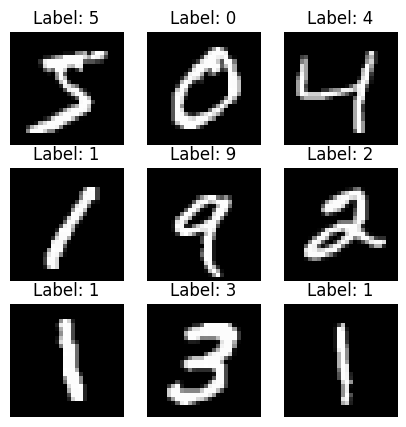

In [4]:
# Display a 3x3 grid of sample images
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

## k-NN Classification (Baseline)

We will use a k-Nearest Neighbors classifier on the raw pixel values as a simple baseline. We flatten the 28x28 images into 784-dimensional vectors and train a k-NN model to predict the digit label.

In [5]:
# Flatten images for k-NN (each image becomes a 784-dimensional vector)
X_train_flat = X_train.reshape(-1, 28*28).astype(np.float32)
X_test_flat = X_test.reshape(-1, 28*28).astype(np.float32)

# Create and train k-NN classifier (using a subset to save time)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_flat[:10000], y_train[:10000])  # train on 10k samples for speed

# Evaluate on a portion of the test set
test_subset = 2000
accuracy = knn.score(X_test_flat[:test_subset], y_test[:test_subset])
print(f"k-NN accuracy on first {test_subset} test images: {accuracy*100:.2f}%")

k-NN accuracy on first 2000 test images: 92.35%


The k-NN classifier gives a quick result but accuracy is limited (around 90% with 3-NN on a small subset). Next, let's train a simple CNN to improve the classification performance.

## CNN Classification

We define a simple Convolutional Neural Network using Keras. The network will have an input layer for the 28x28 images, a couple of convolutional layers, and a fully connected (Dense) output layer. We then train it on the training data and evaluate on the test set.

In [6]:
# Preprocess data for CNN
X_train_cnn = X_train[..., np.newaxis] / 255.0  # add channel dimension and normalize to [0,1]
X_test_cnn = X_test[..., np.newaxis] / 255.0
y_train_cnn = keras.utils.to_categorical(y_train, 10)
y_test_cnn = keras.utils.to_categorical(y_test, 10)

# Define a simple CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/home/wallke/pyenv/vision/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-19 18:14:04.563998: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Now we train the CNN. (For demonstration, we'll train for a few epochs. In practice, more epochs might improve accuracy further.)

In [7]:
# Train the CNN model
model.fit(X_train_cnn, y_train_cnn, epochs=3, batch_size=64, validation_split=0.1)

Epoch 1/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9466 - loss: 0.1779 - val_accuracy: 0.9835 - val_loss: 0.0570
Epoch 2/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9840 - loss: 0.0521 - val_accuracy: 0.9855 - val_loss: 0.0430
Epoch 3/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9890 - loss: 0.0351 - val_accuracy: 0.9890 - val_loss: 0.0369


In [8]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print(f"Test accuracy: {test_acc*100:.2f}%")

Test accuracy: 98.89%


## Evaluate and Visualize Predictions

Let's visualize a few test images with their predicted labels to see how the model performs. Correct predictions will be shown in green, incorrect in red.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


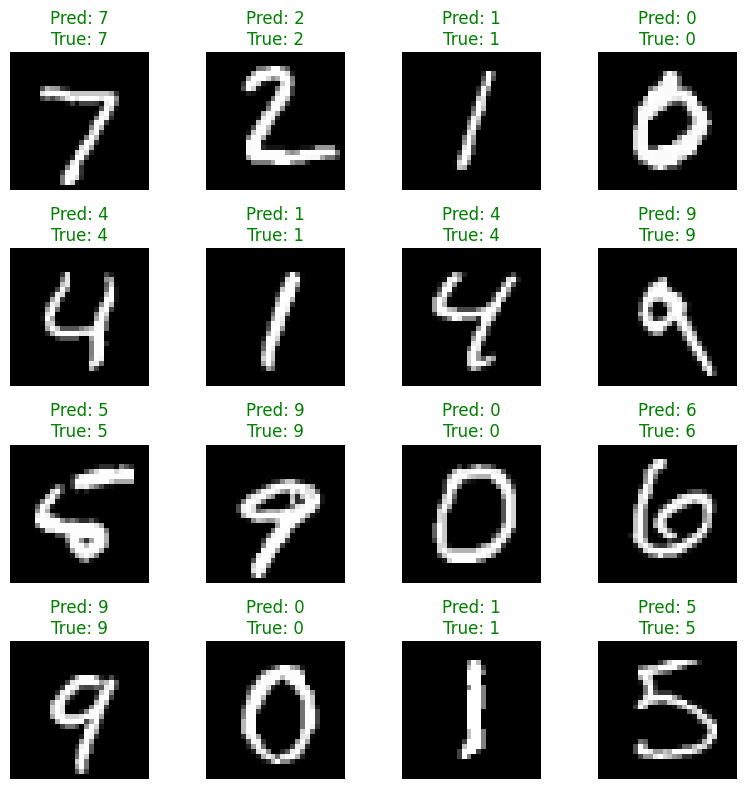

In [9]:
# Predict on a few test images
pred_probs = model.predict(X_test_cnn[:16])  # predict probabilities for first 16 test images
pred_labels = pred_probs.argmax(axis=1)

# Plot the first 16 test images and model predictions
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_test[i], cmap='gray')
    true_label = y_test[i]
    pred_label = int(pred_labels[i])
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()